# Confidence interval, sampling, hypothesis testing
### Dr. Tirthajyoti Sarkar, Fremont, CA 94536

In this Notebook, we will examine a multitude of concepts,

- confidence interval
- sampling methods
- Bootstrapping
- hypothesis testing using James Bond example

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import mean

### Confidence interval

We construct confidence interval around mean using standard error of the sample mean.

$$ \mu \pm t*\frac{\sigma}{\sqrt{(n-1)}} $$

where,

$\mu = \text{sample mean}$, $\sigma = \text{sample standard dev}$, $n = \text{number of samples}$

In [2]:
num_weeks = 52
production = np.random.normal(loc=20,scale=5,size=num_weeks)

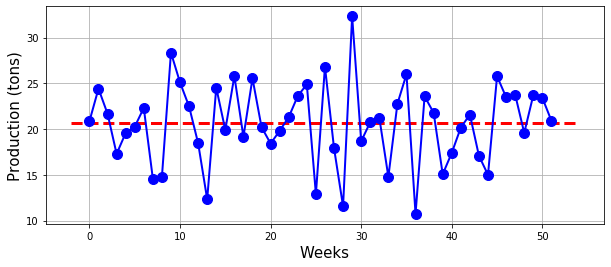

In [3]:
plt.figure(figsize=(10,4))
plt.plot(production,c='blue',lw=2,marker='o',markersize=10)
plt.grid(True)
plt.xlabel("Weeks",fontsize=15)
plt.ylabel("Production (tons)",fontsize=15)
plt.hlines(y=production.mean(),xmin=-2,xmax=54,color='red',linestyle='--',lw=3)
plt.show()

In [4]:
n = len(production)
m = production.mean()
std_err = stats.sem(production)

In [5]:
production.std()

4.418557652666552

In [6]:
production.std()/np.sqrt(n-1)

0.6187218281158524

In [7]:
std_err

0.6187218281158526

In [8]:
confidence = 0.9
h = std_err * stats.t.ppf((1 + confidence) / 2, n - 1)
i90 =[m-h,m+h]
print("90% confidence interval of mean from ",m-h," to ",m+h)

90% confidence interval of mean from  19.61811644389059  to  21.691187177463245


In [9]:
confidence = 0.99
h = std_err * stats.t.ppf((1 + confidence) / 2, n - 1)
i99 =[m-h,m+h]
print("99% confidence interval of mean from ",m-h," to ",m+h)

99% confidence interval of mean from  18.999124058457745  to  22.31017956289609


In [10]:
i90[0],i90[1]

(19.61811644389059, 21.691187177463245)

In [11]:
i99[0],i99[1]

(18.999124058457745, 22.31017956289609)

In [12]:
def repeat(n):
    means = []
    interval_90 = []
    interval_99 = []
    
    for i in range(n):
        num_weeks = 52
        production = np.random.normal(loc=20,scale=5,size=num_weeks)
        means.append(production.mean())
        if i90[0] <= production.mean() <= i90[1]:
            interval_90.append(production.mean())
        if i99[0] <= production.mean() <= i99[1]:
            interval_99.append(production.mean())
    return (interval_90,interval_99,np.array(means))

In [13]:
repeatations = 500
int_90,int_99,_ = repeat(repeatations)

In [14]:
len(int_90)/repeatations

0.714

In [15]:
len(int_99)/repeatations

0.912

---

### Random choice, shuffling

In [16]:
np.random.choice(4, 12)

array([3, 1, 0, 1, 3, 3, 3, 2, 0, 3, 2, 0])

In [17]:
np.random.choice(4, 12, p=[.4, .1, .1, .4])

array([0, 0, 3, 3, 2, 0, 3, 0, 2, 3, 3, 2])

In [18]:
x = np.random.randint(0, 10, (8, 12))
x

array([[0, 9, 0, 3, 0, 9, 1, 0, 9, 9, 3, 2],
       [8, 9, 7, 7, 2, 6, 0, 6, 1, 9, 0, 0],
       [1, 2, 6, 8, 8, 1, 7, 8, 5, 7, 7, 9],
       [0, 9, 1, 0, 4, 7, 5, 8, 9, 9, 5, 0],
       [6, 0, 3, 8, 1, 9, 5, 7, 5, 5, 7, 7],
       [8, 8, 0, 9, 2, 9, 6, 9, 0, 4, 3, 6],
       [8, 4, 2, 7, 0, 9, 9, 7, 0, 1, 5, 9],
       [4, 4, 5, 6, 1, 3, 1, 8, 2, 4, 8, 1]])

In [19]:
# sampling individual elements
np.random.choice(x.ravel(), 12)

array([7, 7, 1, 9, 4, 7, 7, 9, 7, 1, 3, 2])

In [20]:
# sampling rows
idx = np.random.choice(x.shape[0], 4)
x[idx, :]

array([[8, 9, 7, 7, 2, 6, 0, 6, 1, 9, 0, 0],
       [0, 9, 0, 3, 0, 9, 1, 0, 9, 9, 3, 2],
       [8, 9, 7, 7, 2, 6, 0, 6, 1, 9, 0, 0],
       [0, 9, 0, 3, 0, 9, 1, 0, 9, 9, 3, 2]])

In [21]:
# sampling columns
idx = np.random.choice(x.shape[1], 4)
x[:, idx]

array([[9, 2, 3, 1],
       [1, 0, 7, 0],
       [5, 9, 8, 7],
       [9, 0, 0, 5],
       [5, 7, 8, 5],
       [0, 6, 9, 6],
       [0, 9, 7, 9],
       [2, 1, 6, 1]])

In [22]:
# Shuffling occurs "in place" for efficiency and only along the first axis for multi-dimensional arrays
np.random.shuffle(x)
x

array([[0, 9, 0, 3, 0, 9, 1, 0, 9, 9, 3, 2],
       [4, 4, 5, 6, 1, 3, 1, 8, 2, 4, 8, 1],
       [8, 8, 0, 9, 2, 9, 6, 9, 0, 4, 3, 6],
       [8, 9, 7, 7, 2, 6, 0, 6, 1, 9, 0, 0],
       [0, 9, 1, 0, 4, 7, 5, 8, 9, 9, 5, 0],
       [1, 2, 6, 8, 8, 1, 7, 8, 5, 7, 7, 9],
       [6, 0, 3, 8, 1, 9, 5, 7, 5, 5, 7, 7],
       [8, 4, 2, 7, 0, 9, 9, 7, 0, 1, 5, 9]])

In [23]:
# To shuffle columns instead, transpose before shuffling
np.random.shuffle(x.T)
x

array([[0, 0, 3, 9, 0, 9, 3, 9, 2, 9, 1, 0],
       [5, 8, 6, 4, 1, 4, 8, 2, 1, 3, 1, 4],
       [0, 9, 9, 8, 2, 4, 3, 0, 6, 9, 6, 8],
       [7, 6, 7, 9, 2, 9, 0, 1, 0, 6, 0, 8],
       [1, 8, 0, 9, 4, 9, 5, 9, 0, 7, 5, 0],
       [6, 8, 8, 2, 8, 7, 7, 5, 9, 1, 7, 1],
       [3, 7, 8, 0, 1, 5, 7, 5, 7, 9, 5, 6],
       [2, 7, 7, 4, 0, 1, 5, 0, 9, 9, 9, 8]])

### Bootstrapping example (300 samples)

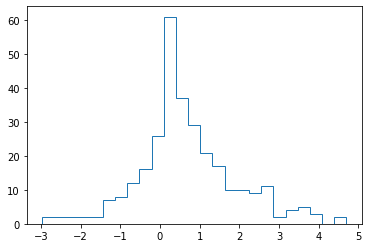

In [24]:
x = np.concatenate([np.random.exponential(size=200), np.random.normal(size=100)])
plt.hist(x, 25, histtype='step');

In [25]:
n = len(x)
reps = 10000

# Bootstrapping n-samples from array x with replacements many times (reps=10000) 
xb = np.random.choice(x, (n, reps))
# Mean of the bootstrappen arrays
mb = xb.mean(axis=0)
# Sort the array of means
mb.sort()

In [26]:
# Compute percentile for 90% confidence interval
np.percentile(mb, [5, 95])

array([0.56481787, 0.79779849])

In [27]:
# Compute percentile for 99% confidence interval
np.percentile(mb, [0.5, 99.5])

array([0.49907621, 0.8697957 ])

### Same underlying process but only 30 samples

In [28]:
x = np.concatenate([np.random.exponential(size=20), np.random.normal(size=10)])

In [29]:
n = len(x)
reps = 10000

# Bootstrapping n-samples from array x with replacements many times (reps=10000) 
xb = np.random.choice(x, (n, reps))
# Mean of the bootstrappen arrays
mb = xb.mean(axis=0)
# Sort the array of means
mb.sort()

In [30]:
# Compute percentile for 90% confidence interval
np.percentile(mb, [5, 95])

array([0.26579967, 0.95020292])

In [31]:
# Compute percentile for 99% confidence interval
np.percentile(mb, [0.5, 99.5])

array([0.09548716, 1.16203742])

---

### Let us simulate James Bond's Martini guessing!

![bond_martini](https://raw.githubusercontent.com/tirthajyoti/Stats-Maths-with-Python/master/images/bond_martini.PNG)

Suppose we gave Mr. Bond a series of 16 taste tests. In each test, we flipped a fair coin to determine whether to stir or shake the martini.

Then we presented the martini to Mr. Bond and asked him to decide whether it was shaken or stirred. Let's say Mr. Bond was correct on 13 of the 16 taste tests.

**Does this prove that Mr. Bond has at least some ability to tell whether the martini was shaken or stirred?**

In [32]:
martini = ['shaken','stirred']

In [33]:
glasses = []
for _ in range(16):
    glasses.append(np.random.choice(martini))    

In [34]:
for g in glasses:
    print(g,end=', ')

stirred, shaken, shaken, stirred, stirred, stirred, stirred, stirred, stirred, shaken, shaken, shaken, shaken, stirred, shaken, stirred, 

### A function to generate Mr. Bond's response (when he is randomly guessing)

In [35]:
def bond_guess(n,verbose=True):
    score=[]
    for _ in range(n):
        bond_answers = []
        for _ in range(16):
            bond_answers.append(np.random.choice(martini))
        if verbose:
            print("My name is Bond...James Bond, and I say the glasses are as follows:",bond_answers)
        correct_guess = np.sum(np.array(bond_answers)==np.array(glasses))
        if verbose:
            print("\nMr. James Bond gave {} correct answers".format(correct_guess))
            print("-"*100)
        score.append(correct_guess)
    return np.array(score)

### Print 5 typical responses when Mr. Bond is randomly guessing 

In [36]:
_=bond_guess(5)

My name is Bond...James Bond, and I say the glasses are as follows: ['shaken', 'stirred', 'stirred', 'stirred', 'shaken', 'stirred', 'shaken', 'shaken', 'stirred', 'stirred', 'shaken', 'stirred', 'stirred', 'shaken', 'stirred', 'shaken']

Mr. James Bond gave 4 correct answers
----------------------------------------------------------------------------------------------------
My name is Bond...James Bond, and I say the glasses are as follows: ['stirred', 'stirred', 'stirred', 'stirred', 'shaken', 'shaken', 'shaken', 'shaken', 'shaken', 'shaken', 'shaken', 'shaken', 'stirred', 'stirred', 'shaken', 'stirred']

Mr. James Bond gave 8 correct answers
----------------------------------------------------------------------------------------------------
My name is Bond...James Bond, and I say the glasses are as follows: ['shaken', 'shaken', 'stirred', 'stirred', 'shaken', 'stirred', 'shaken', 'shaken', 'stirred', 'shaken', 'stirred', 'shaken', 'shaken', 'shaken', 'shaken', 'stirred']

Mr. James 

### Compute the probability of score >=13

In [37]:
score = bond_guess(10000,verbose=False)
print(np.sum(score>=13)/10000)

0.0119


### Show probabilities of all the correct guesses (1-16) 

In [44]:
score = bond_guess(100000,verbose=False)
for i in range(17):
    print(f"Probability of answering {i} correct: {np.sum(score==i)/100000}")

Probability of answering 0 correct: 0.0
Probability of answering 1 correct: 0.00034
Probability of answering 2 correct: 0.00218
Probability of answering 3 correct: 0.0085
Probability of answering 4 correct: 0.02798
Probability of answering 5 correct: 0.06788
Probability of answering 6 correct: 0.12243
Probability of answering 7 correct: 0.17548
Probability of answering 8 correct: 0.19445
Probability of answering 9 correct: 0.17369
Probability of answering 10 correct: 0.12331
Probability of answering 11 correct: 0.06595
Probability of answering 12 correct: 0.02695
Probability of answering 13 correct: 0.00883
Probability of answering 14 correct: 0.00187
Probability of answering 15 correct: 0.00015
Probability of answering 16 correct: 1e-05


### Show probabilities of _at least_ certain number of correct guesses

In [39]:
score = bond_guess(100000,verbose=False)
for i in range(1,17):
    print(f"Probability of answering at least {i} correct: {np.sum(score>=i)/100000}")

Probability of answering at least 1 correct: 0.99999
Probability of answering at least 2 correct: 0.99978
Probability of answering at least 3 correct: 0.99795
Probability of answering at least 4 correct: 0.98931
Probability of answering at least 5 correct: 0.96144
Probability of answering at least 6 correct: 0.8959
Probability of answering at least 7 correct: 0.77334
Probability of answering at least 8 correct: 0.59824
Probability of answering at least 9 correct: 0.40365
Probability of answering at least 10 correct: 0.2277
Probability of answering at least 11 correct: 0.10599
Probability of answering at least 12 correct: 0.03911
Probability of answering at least 13 correct: 0.01085
Probability of answering at least 14 correct: 0.00215
Probability of answering at least 15 correct: 0.00034
Probability of answering at least 16 correct: 0.0


### A function to generate Mr. Bond's response (when he has a certain level of skill to identify correct glass and guesses otherwise)

In [40]:
def bond_knows(n,skill=0.8,verbose=True):
    score=[]
    for _ in range(n):
        bond_answers = []
        for i in range(16):
            c=np.random.uniform()
            if c>=skill:
                bond_answers.append(np.random.choice(martini))
            else:
                bond_answers.append(glasses[i])
        if verbose:
            print("My name is Bond...James Bond, and I say the glasses are as follows:",bond_answers)
        correct_guess = np.sum(np.array(bond_answers)==np.array(glasses))
        if verbose:
            print("\nMr. James Bond gave {} correct answers".format(correct_guess))
            print("-"*100)
        score.append(correct_guess)
    return np.array(score)

In [41]:
_=bond_knows(5)

My name is Bond...James Bond, and I say the glasses are as follows: ['stirred', 'shaken', 'shaken', 'shaken', 'stirred', 'stirred', 'stirred', 'stirred', 'stirred', 'shaken', 'shaken', 'shaken', 'shaken', 'stirred', 'shaken', 'stirred']

Mr. James Bond gave 15 correct answers
----------------------------------------------------------------------------------------------------
My name is Bond...James Bond, and I say the glasses are as follows: ['stirred', 'shaken', 'shaken', 'stirred', 'stirred', 'stirred', 'stirred', 'stirred', 'stirred', 'shaken', 'shaken', 'shaken', 'shaken', 'stirred', 'shaken', 'stirred']

Mr. James Bond gave 16 correct answers
----------------------------------------------------------------------------------------------------
My name is Bond...James Bond, and I say the glasses are as follows: ['stirred', 'shaken', 'shaken', 'stirred', 'stirred', 'stirred', 'stirred', 'stirred', 'stirred', 'stirred', 'shaken', 'stirred', 'shaken', 'stirred', 'shaken', 'stirred']

Mr

In [42]:
score = bond_knows(100000,skill=0.9,verbose=False)
for i in range(1,17):
    print(f"Probability of answering at least {i} correct with 90% skill: {np.sum(score>=i)/100000}")

Probability of answering at least 1 correct with 90% skill: 1.0
Probability of answering at least 2 correct with 90% skill: 1.0
Probability of answering at least 3 correct with 90% skill: 1.0
Probability of answering at least 4 correct with 90% skill: 1.0
Probability of answering at least 5 correct with 90% skill: 1.0
Probability of answering at least 6 correct with 90% skill: 1.0
Probability of answering at least 7 correct with 90% skill: 1.0
Probability of answering at least 8 correct with 90% skill: 1.0
Probability of answering at least 9 correct with 90% skill: 1.0
Probability of answering at least 10 correct with 90% skill: 0.99999
Probability of answering at least 11 correct with 90% skill: 0.99996
Probability of answering at least 12 correct with 90% skill: 0.99914
Probability of answering at least 13 correct with 90% skill: 0.9929
Probability of answering at least 14 correct with 90% skill: 0.95676
Probability of answering at least 15 correct with 90% skill: 0.80996
Probability

In [43]:
score = bond_knows(100000,skill=0.6,verbose=False)
for i in range(1,17):
    print(f"Probability of answering at least {i} correct with 60% skill: {np.sum(score>=i)/100000}")

Probability of answering at least 1 correct with 60% skill: 1.0
Probability of answering at least 2 correct with 60% skill: 1.0
Probability of answering at least 3 correct with 60% skill: 1.0
Probability of answering at least 4 correct with 60% skill: 1.0
Probability of answering at least 5 correct with 60% skill: 1.0
Probability of answering at least 6 correct with 60% skill: 0.99997
Probability of answering at least 7 correct with 60% skill: 0.99972
Probability of answering at least 8 correct with 60% skill: 0.99855
Probability of answering at least 9 correct with 60% skill: 0.99285
Probability of answering at least 10 correct with 60% skill: 0.97311
Probability of answering at least 11 correct with 60% skill: 0.91908
Probability of answering at least 12 correct with 60% skill: 0.79842
Probability of answering at least 13 correct with 60% skill: 0.5958
Probability of answering at least 14 correct with 60% skill: 0.34953
Probability of answering at least 15 correct with 60% skill: 0.1